In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

## Regression Implementation

In [116]:
# Generate data
np.random.seed(42)
X = np.random.rand(100, 1) * 4.0 - 2.0       
y = np.sin(2.5 * X[:, 0]) + 0.3 * np.random.randn(100)

In [117]:
# Convert to DataFrame
df = pd.DataFrame({
    'X': X[:, 0],   # flatten the 2D array into 1D
    'y': y
})

In [118]:
print(df.shape)
df.head()

(100, 2)


,X,y
0,-0.501840,-0.924311
1,1.802857,-1.068713
2,0.927976,0.759801
3,0.394634,0.237877
4,-1.375925,0.227919


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

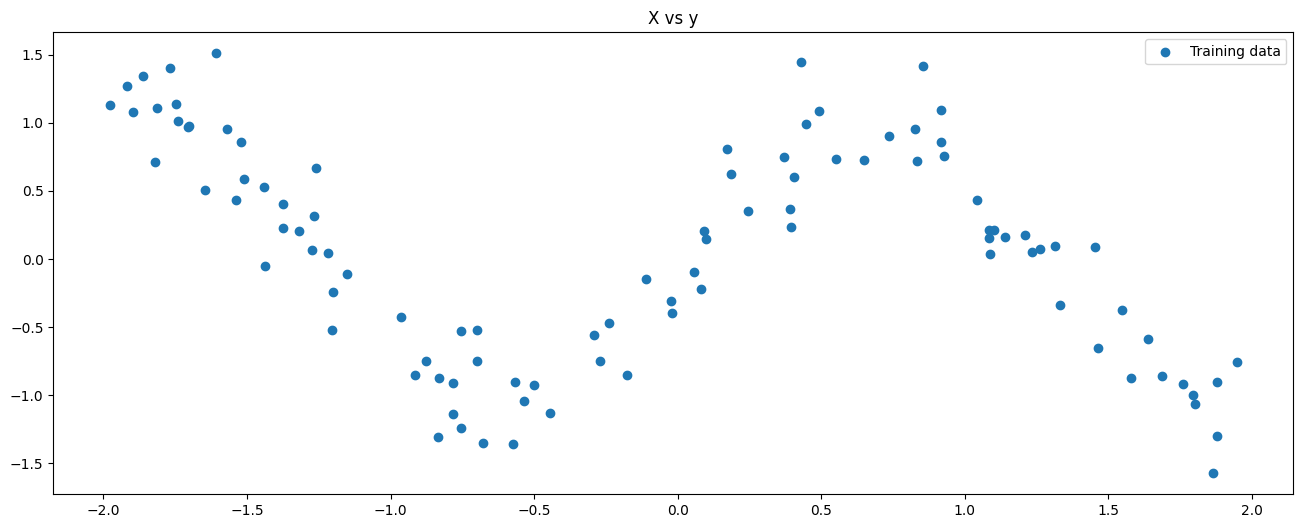

In [120]:
plt.figure(figsize=(16, 6))
plt.scatter(df['X'], df['y'], label='Training data')
plt.title('X vs y')
plt.legend()
plt.show()

In [121]:
gb_reg = GradientBoostingRegressor(n_estimators=50)

gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50)

In [122]:
y_pred = gb_reg.predict(X_test)

In [123]:
r2_score(y_test, y_pred)

0.881771622031829

---

In [124]:
# Generate a smooth line
X_test1 = np.linspace(-2, 2, 500).reshape(-1, 1)
y_pred1 = gb_reg.predict(X_test1)

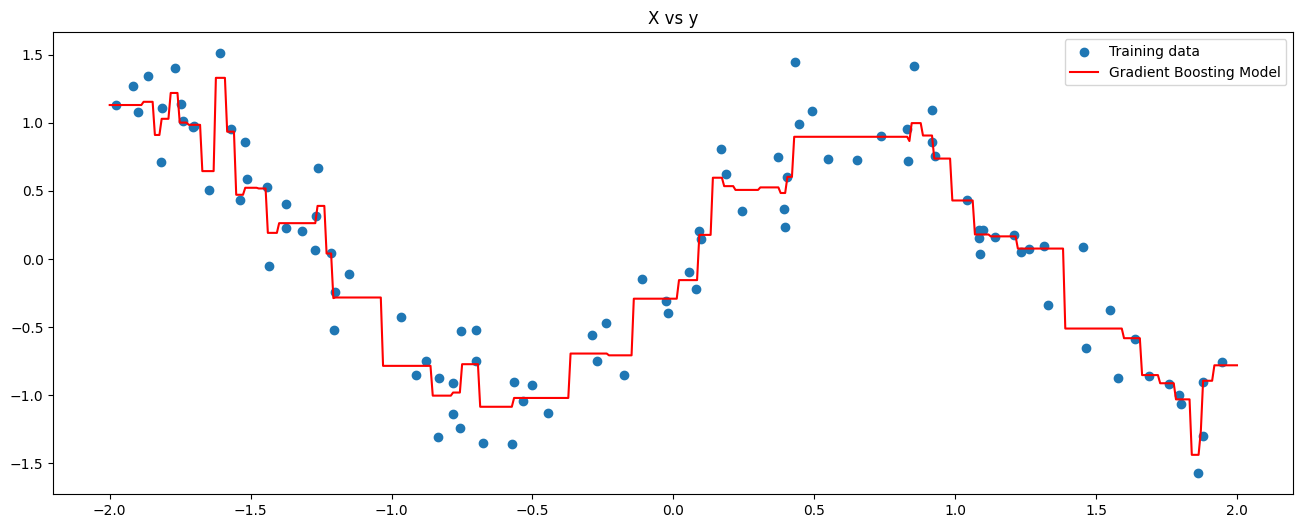

In [125]:
plt.figure(figsize=(16, 6))
plt.scatter(df['X'], df['y'], label='Training data')
plt.plot(X_test1, y_pred1, label='Gradient Boosting Model', color = 'red')
plt.title('X vs y')
plt.legend()
plt.show()

## Classification Implementation

In [126]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [127]:
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
gb_clas = GradientBoostingClassifier(n_estimators=100)

gb_clas.fit(X_train, y_train)

GradientBoostingClassifier()

In [129]:
y_pred = gb_clas.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred)

1.0

In [131]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)